In [1]:
# Hypothesis Testing

In [2]:
# HA: Drug response time is less 5min
# H0 : Drug Response time is >5 min

In [3]:
import numpy as np
import scipy.stats as stats

In [4]:
zstat=(4.8-5)/(0.8/np.sqrt(50))
zstat

-1.7677669529663704

In [5]:
stats.norm.cdf(zstat)

0.03854993587177073

In [6]:
stats.norm.isf(0.05)

1.6448536269514729

In [7]:
# Covid
# H0: positive covid age is 38
# HA :positive covid age is not 38
zstat=(37.2-38)/(4.3/np.sqrt(2500))
zstat

-9.302325581395317

In [8]:
stats.norm.cdf(zstat)*2 #for 2 tail test

1.3740677108247303e-20

# one sample T test

For a particular organization, the average age of the employees was claimed 30 years.
The authorities collected a random sample of employees' age data to check the claim made by the organization.
Construct a hypothesis test to validate the hypothesis at a significance level of 0.05.

Ho = mean > 30

Ha = mean $\neq$ 30

In [18]:
from scipy.stats import ttest_1samp
import pandas as pd
import numpy as np


ages = pd.read_csv("Ages.csv")
ages
#One Numeric Sample


tset, pval = ttest_1samp(ages, 30, alternative="less") # for 2 tail test remove 'alternative="less"'
# tset is statistics and pval --- Order is important
# test is for sample but the Hypothesis claim is for entire population

print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis hence  Ha - as Avg age < 30")
else:
    print("we are accepting null hypothesis hence H0 - as Avg age > 30")

p-values [0.99493519]
we are accepting null hypothesis hence H0 - as Avg age > 30


In [14]:
ages_mean = np.mean(ages)
print(ages_mean)

ages    43.75
dtype: float64


/Users/ksganand/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# Two Sample T Test

One Numerical and one Categorical varialbes/columns/  features, In this the categorical variable should be 2 level only - binomial

Feature reduction - If there is no use of that column on the data analysis. / No relation betweeen columns to be analysed. 

In [20]:
data=pd.read_csv("HR_newdata.csv")

In [22]:
data.head(10)

,Unnamed: 0,Individual,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age1,MonthlyIncome1
0,0,Ind1,Yes,41,1,1102,1,1,2,1,...,0,8,0,1,6,4,0,5,43.1,8952.576429
1,1,Ind2,No,49,2,279,2,8,1,1,...,1,10,3,3,10,7,1,7,42.4,15078.533314
2,2,Ind3,Yes,37,1,1373,2,2,2,6,...,0,7,3,3,0,0,0,0,41.2,8937.969054
3,3,Ind4,No,33,2,1392,2,3,4,1,...,0,8,3,3,8,7,3,0,32.0,10895.094251
4,4,Ind5,No,27,1,591,2,2,1,2,...,1,6,3,3,2,2,2,2,32.0,13826.520409
5,5,Ind6,No,32,2,1005,2,2,2,1,...,0,8,2,2,7,7,3,6,29.3,12656.722550
6,6,Ind7,No,59,1,1324,2,3,3,2,...,3,12,3,2,1,0,0,0,30.6,13880.932806
7,7,Ind8,No,30,1,1358,2,24,1,1,...,1,1,2,3,1,0,0,0,31.6,11376.407498
8,8,Ind9,No,38,2,216,2,23,3,1,...,0,10,2,3,9,7,1,8,34.5,15119.349158
9,9,Ind10,No,36,1,1299,2,27,3,2,...,2,17,3,2,7,7,7,7,43.4,10148.166811


In [23]:
data['Gender'].value_counts()

1    882
2    588
Name: Gender, dtype: int64

In [24]:
# Whether this company showing any gender bias interms of providing salary ?


# Ho: Male salary = Female Salary (No bias)
# Ha: Male Salary != Female Salary


In [25]:
#Using filter and selecting only Month Income
grp1=data[data['Gender']==1]['MonthlyIncome']
grp2=data[data['Gender']==2]['MonthlyIncome']

In [26]:
len(grp1),len(grp2)

(882, 588)

In [ ]:
np.mean(grp1),np.mean(grp2)

dependent vs relative - in Feeback example - second feedback is dependent on first feedback. here we just don't call as dependent but we call it is as relative because same audience is giving feedback

for this HR_newdata for the male and female group they are independent groups. 


always mean is treated as parametric test - All the tests assumes that the distribution is normal

If it is not normal distribution this test doesn't give good results

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

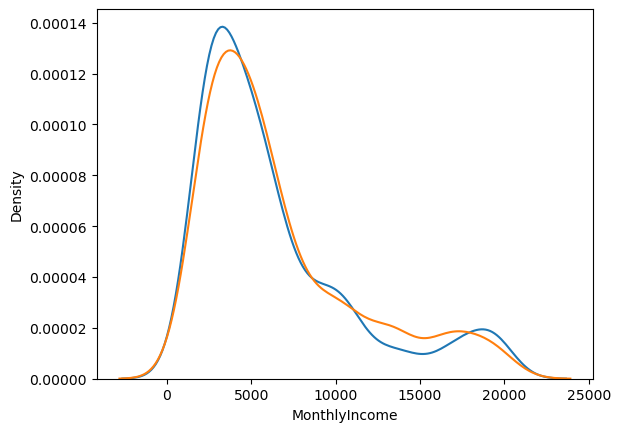

In [27]:
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
sb.distplot(grp1,hist=False)
sb.distplot(grp2,hist=False)

In [28]:
#H0: Male salary = Female Salary
#H1: Male Salary != Female Salary
import numpy as np
import scipy.stats as stats
z, pval = stats.ttest_ind(grp1,grp2)
if pval > 0.05:
    print("#H0: Male salary = Female Salary")
else:
    print ("#H1: Male Salary != Female Salary")

#H0: Male salary = Female Salary


In [29]:
# Parametric test - Generally have some assumptions
# For ttest, the assumptions are
  #1. Each group data must be close to normal
  #2. Variance of group must close to each other

In [30]:
# Shapiro test for checking the Normality of the data
# H0 : Data is normally distributed
# Ha: Data is not normally Distributed

In [31]:
t,p=stats.shapiro(grp1)
if p>0.05:
    print(p,"Data can be normally distributed")
else:
    print(p,"Data is not normal")

1.7098770919716375e-30 Data is not normal


In [32]:
t,p=stats.shapiro(grp2)
if p>0.05:
    print(p,"Data can be normally distributed")
else:
    print(p,"Data is not normal")

9.378564564919968e-24 Data is not normal


So 2 Sample testing can't be applied here as it is not normal distribution and variance is high


In [35]:
# Levene test is to check the varaince between two groups
# H0: Varaince between two group is same
# Ha: Varaince between the group is not same

t,p=stats.levene(grp1,grp2)
if p>0.05:
    print(p,"Variance can be same")
else:
    print(p,"Variance is not same")

0.7173805016372548 Variance can be same


So applying another test - Mannwhitenyu 

In [38]:
# Mannwhitenyu Test - Non parametric test for two sample ttest
# H0: Median of group 1 = Median of group 2
# Ha: Median of two groups are not equal

zstat, pvaluem = stats.mannwhitneyu(grp1,grp2,alternative='two-sided')

if pvaluem > 0.05:
    print("H0: median of Male Salary = Female Salary")
if pvaluem < 0.05:
    print("H0: median of Male Salary != Female Salary")

H0: median of Male Salary = Female Salary


In [39]:
# Same perform for monthincome1

# Proportion_Test

One proportion Test

Two proportion Test

Chisqure Test

# One proportion Test


#Health officials of India is expecting cancer is affecting more men than women, 

#they are expecting 65% of affected case in India are Men. To verify this hypothesis, random

#samples (n=1500) across India were collected,the samples are as follows: Men:900, Women:600

One Proportion test is applicable for 1 categorical data only 
 
Two proportion test would be applicable if 2 categorical data - One is dependent and another on is independent where the independnt is only at 2 level (Ex Male / female)
 
Chi square -   this would be applicable if more categorical data - One is dependent and another on is independent where the independnt is at more levels (Ex: Region North, East, west, south)
 
Two proportion also can be done using Chi square
 
If it is beyond then go for Machine learning packages.
 

In [50]:

# H0: Proportion of men affected = 65
# HA: Not equal to 65

In [51]:
from statsmodels.stats.proportion import proportions_ztest

In [52]:
zstat,pval=proportions_ztest(900,1500,0.65)
zstat, pval

(-3.9528470752104776, 7.722679550543272e-05)

In [53]:
if pval>=0.05:
    print("HO: Proportion of men affected = 65")
else:
    print("HA: Proportion of men affected not equal to 65") 

HA: Proportion of men affected not equal to 65


In [54]:
#POST HOC(proof) for men
xbar = 900/1500
xbar

0.6

In [47]:
sd=np.sqrt((900*(1-0.6)**2 + 600*(0-0.6)**2)/1500) ### ?????

In [48]:
import numpy as np
se=sd/np.sqrt(1500)
se

0.012649110640673518

In [49]:
#95 percent CF
#xbar +/- 1.96*se
[0.6-1.96*se,0.6+1.96*se]

[0.5752077431442799, 0.62479225685572]

# Two proportion Test

#Government are analyzing the impact of cancer in Rural and Urban Area, 
#The collected data showing the charactersistics below, Check the significance of Rural and Urban Area affecting the disease



In [55]:
import pandas as pd
df=pd.DataFrame({'Rural':[867,490],'Urban':[500,550]})
df.index=['Negative','Positive']
df

,Rural,Urban
Negative,867,500
Positive,490,550


In [57]:
#H0 Cancer spread in urban = Cancer spread in rural
#Ha: Cancer spread in urban != Cancer spread in rural

# Learn about crosstab in python --- ????

In [58]:
# Two sample proportion test
statss,pval=proportions_ztest([490,550],[490+867,500+550])
statss,pval

(-7.9920767350927475, 1.3268440495388725e-15)

In [59]:
if pval>=0.05:
    print("H0: Cancer spread in urban = Cancer spread in rural")
else:
    print("HA: Cancer spread in urban != Cancer spread in rural")

HA: Cancer spread in urban != Cancer spread in rural


# Chi Square Test

In [69]:
#The cancer data were collected from europe and india for the different age group categories
#Check the pattern is similar between two countries


829.5774647887324

In [70]:
df=pd.DataFrame({'India':[1100,500,400],'europe':[800,450,300]})
df.index=['Seniors','Y&M','Childrens']
df

,India,europe
Seniors,1100,800
Y&M,500,450
Childrens,400,300


In [79]:
1900*2000 /3550

1070.4225352112676

In [75]:
exp # to check if the patterns in simple way to verify if the below Chi square derivation is correct.

array([[1070.42253521,  829.57746479],
       [ 535.21126761,  414.78873239],
       [ 394.36619718,  305.63380282]])

In [80]:
# H0: Spread of desease for differnt age category is same in India and Europe
#HA: not same

In [72]:
from scipy.stats import chi2_contingency

In [73]:
chi_stat,pval,df,exp=chi2_contingency(df)

In [74]:
if pval>=0.05:
    print("H0: Spread of desease for differnt age category is same in India and Europe")
else:
    print("HA: Spread of desease for differnt age category is not same in India and Europe")

HA: Spread of desease for differnt age category is not same in India and Europe


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1470 non-null   int64  
 1   Individual                1470 non-null   object 
 2   Attrition                 1470 non-null   object 
 3   Age                       1470 non-null   int64  
 4   BusinessTravel            1470 non-null   int64  
 5   DailyRate                 1470 non-null   int64  
 6   Department                1470 non-null   int64  
 7   DistanceFromHome          1470 non-null   int64  
 8   Education                 1470 non-null   int64  
 9   EducationField            1470 non-null   int64  
 10  EmployeeCount             1470 non-null   int64  
 11  EmployeeNumber            1470 non-null   int64  
 12  EnvironmentSatisfaction   1470 non-null   int64  
 13  Gender                    1470 non-null   int64  
 14  HourlyRa

In [83]:
data.head()

,Unnamed: 0,Individual,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age1,MonthlyIncome1
0,0,Ind1,Yes,41,1,1102,1,1,2,1,...,0,8,0,1,6,4,0,5,43.1,8952.576429
1,1,Ind2,No,49,2,279,2,8,1,1,...,1,10,3,3,10,7,1,7,42.4,15078.533314
2,2,Ind3,Yes,37,1,1373,2,2,2,6,...,0,7,3,3,0,0,0,0,41.2,8937.969054
3,3,Ind4,No,33,2,1392,2,3,4,1,...,0,8,3,3,8,7,3,0,32.0,10895.094251
4,4,Ind5,No,27,1,591,2,2,1,2,...,1,6,3,3,2,2,2,2,32.0,13826.520409


In [84]:
#I want to undesand the imapct of WorkLifeBalance on Attrition
#WorkLifeBalance - Categorical - having 4 level
#Atrition - Categorical - having 2 level

# We should perform chisquare_contingency

In [85]:
data['WorkLifeBalance']=data['WorkLifeBalance'].astype('object')

In [86]:
data['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [87]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [89]:
tab=pd.crosstab(data['WorkLifeBalance'],data['Attrition'])
tab

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


In [93]:
exp

array([[ 67.10204082,  12.89795918],
       [288.53877551,  55.46122449],
       [749.02653061, 143.97346939],
       [128.33265306,  24.66734694]])

In [95]:
(tab/data['Attrition'].value_counts())*100

Attrition,No,Yes
WorkLifeBalance,,
1,4.460665,10.548523
2,23.195458,24.472574
3,62.124899,53.586498
4,10.218978,11.392405


In [91]:

from scipy.stats import chi2_contingency
chi_stat,pval,df,exp=chi2_contingency(tab)

In [96]:
if pval>=0.05:
    print("H0: No relation between attrition and Worlife balance")
else:
    print("HA:Relation exist  between attrition and Worlife balance")
    
# Chi square only gives relation only but doesn't precize judge 

HA:Relation exist  between attrition and Worlife balance


# ANOVA Test

![ANOVA.png](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/ANOVA.png)

In [ ]:
import pandas as pd
data=pd.read_excel("delivery.xlsx")

In [ ]:
#data.to_excel("delivery.xlsx")

In [ ]:
data.head(2)

In [ ]:
gA=data[data['Region']=='A']['Minutes']
gB=data[data['Region']=='B']['Minutes']
gC=data[data['Region']=='C']['Minutes']

In [ ]:
# H0: The time taken to deliver the parcels in three regions are Same.
# HA: The time taken to deliver the parcels in three regions are differnt.

In [ ]:
# Anova is a parametric method - Check Assumptions
# Normality and levene

In [ ]:
stats.shapiro(data['Minutes'])
#H0:Data is normaly distributed
#pval is > 0.05, hence data can be consider as normal

In [ ]:
stats.levene(gA,gB,gC)
#H0: group variance are same

In [ ]:
stats.f_oneway(gA,gB,gC)

In [ ]:
# pval <0.05, Reject H0:
# The time taken to deliver the parcels in three regions are differnt.

In [ ]:
# ANalyse based on Truck age
data.head(2)

In [ ]:
data['TruckAge'].quantile([0.25,0.5,0.75])

In [ ]:
# 1 to 4 --- 'Brand New'
# 5 to 7 --- Medium
# >8-------->old

In [ ]:
data['TruckAge'].unique()

In [ ]:
data['TruckAge_level']=pd.cut(data['TruckAge'],bins=[0,4,7,15],
                               labels=['New','Medium','Old'])

data.head(2)

In [ ]:
data['TruckAge_level'].unique()

In [ ]:
gA1=data[data['TruckAge_level']=='Old']['Minutes']
gB1=data[data['TruckAge_level']=='New']['Minutes']
gC1=data[data['TruckAge_level']=='Medium']['Minutes']

In [ ]:
stats.levene(gA1,gB1,gC1)


In [ ]:
stats.f_oneway(gA1,gB1,gC1)